In [8]:
import pandas as pd

data = pd.read_csv('../output/report n_pred_vec compare.csv')

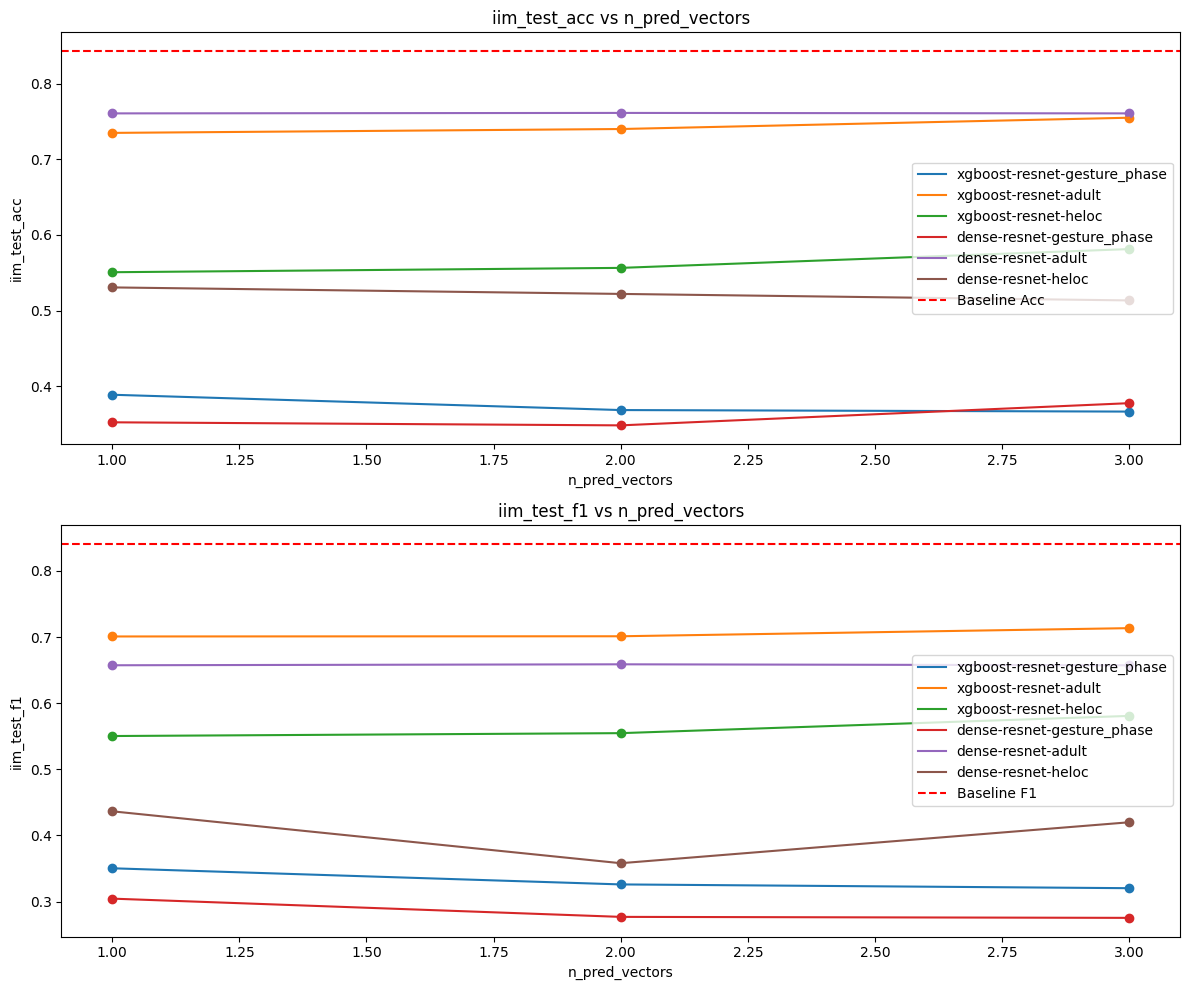

In [13]:
import matplotlib.pyplot as plt


# Filter data for n_pred_vectors between 1 and 3
filtered_data = data[data['n_pred_vectors'].between(1, 3)]

# Extract unique combinations of iim_model, encryptor, and dataset
combinations = filtered_data[['iim_model', 'encryptor', 'dataset']].drop_duplicates()

# Initialize the plots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

# Plot scatter points with connected lines for each combination
for _, row in combinations.iterrows():
    model = row['iim_model']
    encryptor = row['encryptor']
    dataset = row['dataset']
    subset = filtered_data[(filtered_data['iim_model'] == model) & 
                           (filtered_data['encryptor'] == encryptor) & 
                           (filtered_data['dataset'] == dataset)]
    
    label = f'{model}-{encryptor}-{dataset}'
    
    ax1.scatter(subset['n_pred_vectors'], subset['iim_test_acc'])
    ax1.plot(subset['n_pred_vectors'], subset['iim_test_acc'], label=label)
    
    ax2.scatter(subset['n_pred_vectors'], subset['iim_test_f1'])
    ax2.plot(subset['n_pred_vectors'], subset['iim_test_f1'], label=label)

# Add baseline dotted lines
baseline_acc = filtered_data['baseline_acc'].iloc[0]
baseline_f1 = filtered_data['baseline_f1'].iloc[0]

ax1.axhline(y=baseline_acc, color='r', linestyle='--', label='Baseline Acc')
ax2.axhline(y=baseline_f1, color='r', linestyle='--', label='Baseline F1')

# Set labels and titles for accuracy plot
ax1.set_xlabel('n_pred_vectors')
ax1.set_ylabel('iim_test_acc')
ax1.set_title('iim_test_acc vs n_pred_vectors')
ax1.legend()

# Set labels and titles for F1 score plot
ax2.set_xlabel('n_pred_vectors')
ax2.set_ylabel('iim_test_f1')
ax2.set_title('iim_test_f1 vs n_pred_vectors')
ax2.legend()

# Show plots
plt.tight_layout()
plt.show()
